# Khai báo các thư viện

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import  ImageDataGenerator
import matplotlib.pyplot as plt
import pickle
from sklearn.utils import shuffle
from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pylab as plt
import tensorflow as tf
import pandas as pd
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten, Conv2D, MaxPooling2D, Dropout 
from tensorflow.keras.optimizers import SGD,RMSprop,Adam

#Tạo dữ liệu train từ Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
dataset_path = '/content/gdrive/MyDrive/chest_xray/train/'

In [ ]:
image_size = (150,150)
TRAINING_DATA_DIR = str(dataset_path)
print(TRAINING_DATA_DIR)

# modify data
kwargs_datagen = dict(rescale=1./255, validation_split=0.2) # 20 percent for validation

# validation data modify 
valid_datagen = ImageDataGenerator(**kwargs_datagen)
valid_generator = valid_datagen.flow_from_directory(TRAINING_DATA_DIR, subset="validation", 
                                                    shuffle=True, target_size=image_size)

# train data modify
train_datagen = ImageDataGenerator(**kwargs_datagen)
train_generator = train_datagen.flow_from_directory(TRAINING_DATA_DIR,subset="training",
                                                    shuffle=True,target_size=image_size)

"""*Sắp xếp và match labels*"""

image_batch_train, label_batch_train = next(iter(train_generator))
print("image batch shape: ", image_batch_train.shape)
print("label batch shape: ", label_batch_train.shape)
dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print("labels: ", dataset_labels)
print("match class: ", train_generator.class_indices)

/content/gdrive/MyDrive/chest_xray/train/
Found 1043 images belonging to 2 classes.
Found 4173 images belonging to 2 classes.
image batch shape:  (32, 150, 150, 3)
label batch shape:  (32, 2)
labels:  ['Normal' 'Pneumonia']
match class:  {'NORMAL': 0, 'PNEUMONIA': 1}


# Tạo model 


In [ ]:

#tao model

model = Sequential()
model.add(Conv2D(32, (3,3), kernel_initializer= 'he_uniform', padding= 'same',  input_shape= (150,150,3)))  # Kernel = 3x3, du lieu dau vao (150,150,3) 
model.add(Conv2D(32, (3,3), kernel_initializer= 'he_uniform', padding= 'same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), kernel_initializer= 'he_uniform', padding= 'same'))
model.add(Conv2D(64, (3,3), kernel_initializer= 'he_uniform', padding= 'same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), kernel_initializer= 'he_uniform', padding= 'same'))
model.add(Conv2D(128, (3,3), kernel_initializer= 'he_uniform', padding= 'same'))
model.add(MaxPooling2D((2,2)))



model.add(Conv2D(256, (3,3), kernel_initializer= 'he_uniform', padding= 'same'))
model.add(Conv2D(256, (3,3), kernel_initializer= 'he_uniform', padding= 'same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(512, (3,3), kernel_initializer= 'he_uniform', padding= 'same'))
model.add(Conv2D(512, (3,3), kernel_initializer= 'he_uniform', padding= 'same'))
model.add(MaxPooling2D((2,2)))
#ANN training
model.add(Flatten())
model.add(Dense(512, activation= 'relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation= 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

# Khai báo các thông số training & Compile model

In [ ]:

num_batch = 16
num_epochs = 10
# optimizer = SGD(lr = 0.01, momentum= 0.9)
optimizer = Adam()
# train_img = x_train
# train_lbl = y_train 

# Compile model
model.compile(optimizer= optimizer, loss = 'binary_crossentropy', metrics= 'accuracy')

# Training 

In [ ]:
history1=model.fit(train_generator,epochs= num_epochs,batch_size= num_batch, validation_data=valid_generator, verbose=1)

Epoch 1/10
131/131 [==============================] - 1049s 8s/step - loss: 40.4782 - accuracy: 0.7132 - val_loss: 0.2988 - val_accuracy: 0.8648
Epoch 2/10
131/131 [==============================] - 62s 477ms/step - loss: 0.2297 - accuracy: 0.9111 - val_loss: 0.1588 - val_accuracy: 0.9386
Epoch 3/10
131/131 [==============================] - 61s 465ms/step - loss: 0.1773 - accuracy: 0.9343 - val_loss: 0.1862 - val_accuracy: 0.9300
Epoch 4/10
131/131 [==============================] - 60s 461ms/step - loss: 0.1196 - accuracy: 0.9578 - val_loss: 0.1298 - val_accuracy: 0.9492
Epoch 5/10
131/131 [==============================] - 61s 463ms/step - loss: 0.1119 - accuracy: 0.9593 - val_loss: 0.0999 - val_accuracy: 0.9655
Epoch 6/10
131/131 [==============================] - 61s 466ms/step - loss: 0.0894 - accuracy: 0.9667 - val_loss: 0.1010 - val_accuracy: 0.9636
Epoch 7/10
131/131 [==============================] - 61s 465ms/step - loss: 0.0892 - accuracy: 0.9705 - val_loss: 0.0809 - val_ac

In [ ]:
from keras.models import load_model
model= model.

# Đồ thị biểu diễn các giá trị training 

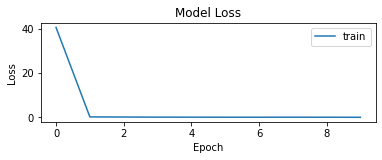

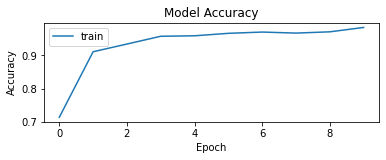

In [ ]:
#Vẽ đồ thị loss 
plt.subplot(2,1,1)
plt.plot(history1.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','validation'])
plt.show()
#Vẽ đồ thị Accuracy
plt.subplot(2,1,2)
plt.plot(history1.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validation'])
plt.show()

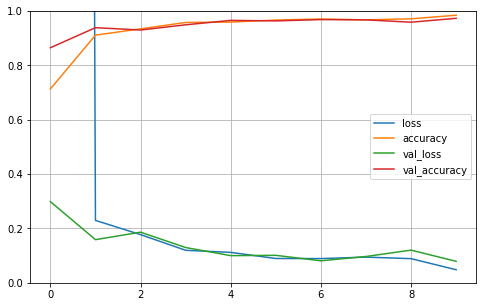

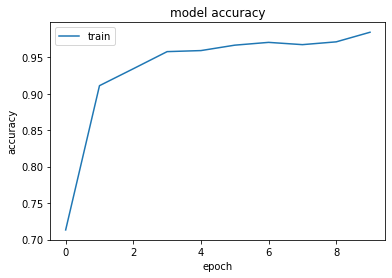

In [ ]:
import pandas as pd

pd.DataFrame(history1.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

plt.plot(history1.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

#Chuẩn đoán bệnh Viêm phổi bằng ảnh X quang 
### Sử dụng model vừa được train ở phần training để dự đoán tình trạng của bệnh nhân thông qua ảnh x quang được upload lên 
Các ảnh X quang dùng để test được chia làm 2 loại:
  - Loại thứ nhất là ảnh X quang của người có tình trạng phổi bình thường
  - Loại thứ hai là ảnh X quang của người bị viêm phổi 

### Kết quả dự đoán tình trạng bệnh viêm phổi bằng ảnh X quang được trình bày qua giá trị của biến 'pred'.
  - Nếu pred = 0 thì phổi của người này bình thường 
  - Nếu pred = 1 thì người này đã bị viêm phổi 